# Chaîne de communication

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('../../_static/diagram.mplstyle')
plt.rcParams.update({
    'font.size': 16,
})

In [2]:
def block(ax, x, y, w, h, txt):
    """Bloc"""
    p = plt.Rectangle((x, y), w, h, facecolor="white", edgecolor="black")
    ax.add_patch(p)
    plt.text(x+w/2, y+h/2, txt, ha="center", va="center")
    
def add(ax, x, y):
    """Sommateur"""
    p = mpatches.Circle((x, y), .5, facecolor="white", edgecolor="black")
    ax.add_artist(p)
    plt.text(x, y, "+", ha="center", va="center")
    
def arrow(ax, x, y, w, h):
    """Flèche"""
    ax.arrow(x, y, w, h, fc="k", ec="k", head_width=0.1, head_length=0.1, linewidth=.5, length_includes_head=True)
    
def label(ax, x, y, txt):
    """Étiquette de texte simple"""
    plt.text(x, y, txt, ha="center", va="center")

def drawing(w, h, debug=False):
    """Fenêtre et axe"""
    fig, ax = plt.subplots(1, 1, figsize=(w,h))
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(0, w)
    ax.set_ylim(0, h)
    if debug:
        p = plt.Rectangle((0, 0), w, h, fill=False, edgecolor="tab:cyan", linewidth=2)
        ax.add_patch(p)
    return fig, ax
    
def saving(ax, filename):
    """Enregistrement et affichage"""
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

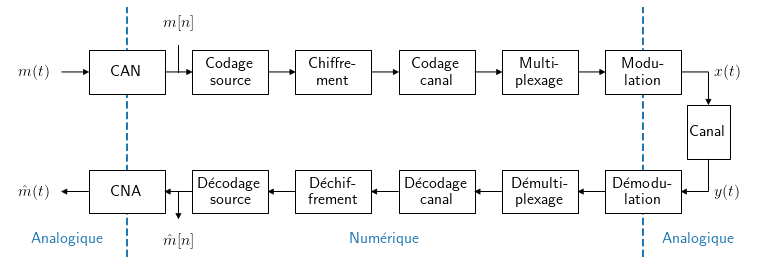

In [3]:
w, h, aw = 1.4, .8, .5
f1 = 1.5 + w/2
f2 = 1.5 + (aw+w)*5 + w/2

fig, ax = drawing(14, 4.6, debug=False)

# # Domaines analogiques et numériques
plt.plot([f1, f1], [0, 4.6], color="tab:blue", linewidth=2, zorder=0, linestyle="--")
plt.plot([f2, f2], [0, 4.6], color="tab:blue", linewidth=2, zorder=0, linestyle="--")
plt.text(f1/2,         0.2, 'Analogique', ha='center', va='bottom', color="tab:blue")
plt.text(f1+(f2-f1)/2, 0.2, 'Numérique',  ha='center', va='bottom', color="tab:blue")
plt.text(f2+1,         0.2, 'Analogique', ha='center', va='bottom', color="tab:blue")

# Blocs de l'émetteur
blocks = [ "CAN", "Codage\nsource", "Chiffre-\nment", "Codage\ncanal", "Multi-\nplexage", "Modu-\nlation" ]
x = 1.5
y = 3.0
plt.text(.2, y+h/2, '$m(t)$', ha='left', va='center')
plt.plot([1.5+aw*0.5+w, 1.5+aw*0.5+w], [y+h/2, y+h/2+.5], color="k", linewidth=1)
plt.text(1.5+aw*0.5+w, y+1.3, '$m[n]$', ha='center', va='center')
for b in blocks:
    arrow(ax, x-aw, y+h/2, aw, 0)
    block(ax, x, y, w, h, b)
    x += w + aw
    
# Blocs du récepteur
blocks = [ "CNA", "Décodage\nsource", "Déchif-\nfrement", "Décodage\ncanal", "Démulti-\nplexage", "Démodu-\nlation" ]
x = 1.5
y = 0.8
plt.text(.2, y+h/2, '$\hat{m}(t)$', ha='left', va='center')
arrow(ax, 1.5+aw*0.5+w, y+h/2, 0, -.5)
plt.text(1.5+aw*0.5+w, y-.5, '$\hat{m}[n]$', ha='center', va='center')
for b in blocks:
    arrow(ax, x, y+h/2, -aw, 0)
    block(ax, x, y, w, h, b)
    x += w + aw

# Canal
x = 13
plt.text(x   , 3+h/2, '$x(t)$', ha='left', va='center')
ax.arrow(x-.6, 3.4, .5, 0, fc='k', ec='k', linewidth=.5, length_includes_head=True)
ax.arrow(x-.1, 3.4, 0, -.6, head_width=0.1, head_length=0.1, fc='k', ec='k', linewidth=.5, length_includes_head=True)
block(ax,x-.5, 1.8, .8, 1, 'Canal')
ax.arrow(x-.1, 1.8, 0, -.6, fc='k', ec='k', linewidth=.5, length_includes_head=True)
ax.arrow(x-.1, 1.2, -.5, 0, head_width=0.1, head_length=0.1, fc='k', ec='k', linewidth=.5, length_includes_head=True)
plt.text(x   , y+h/2, '$y(t)$', ha='left', va='center')

plt.savefig("chaine.svg", format="svg", bbox_inches='tight')
plt.show()